---
# **Business Case : Hypothesis Testing**


A popular e-bike rental company has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, **they want to understand the factors affecting the demand for these shared electric cycles in the Indian market**.


## **Analyzing basic metrics & Pre-Processing of data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# for z-test
import numpy as np
from scipy.stats import norm

#for t-test
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, ttest_ind_from_stats

# for Chi-Square
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# for ANOVA
from scipy.stats import f_oneway
from scipy.stats import kruskal

# for Correlation
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# for Poisson Distribution
from scipy.stats import poisson

# for exponential distribution
from scipy.stats import expon

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- No Null values present in the dataset

In [ ]:
# converting the data type of datetime from object to datetime64[ns]
df['datetime'] = pd.to_datetime(df['datetime'])

# Converting other necessary variables to categorical
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## **Exploratory Data Analysis**

### Univariate Analysis

#### Histograms for Continous Columns

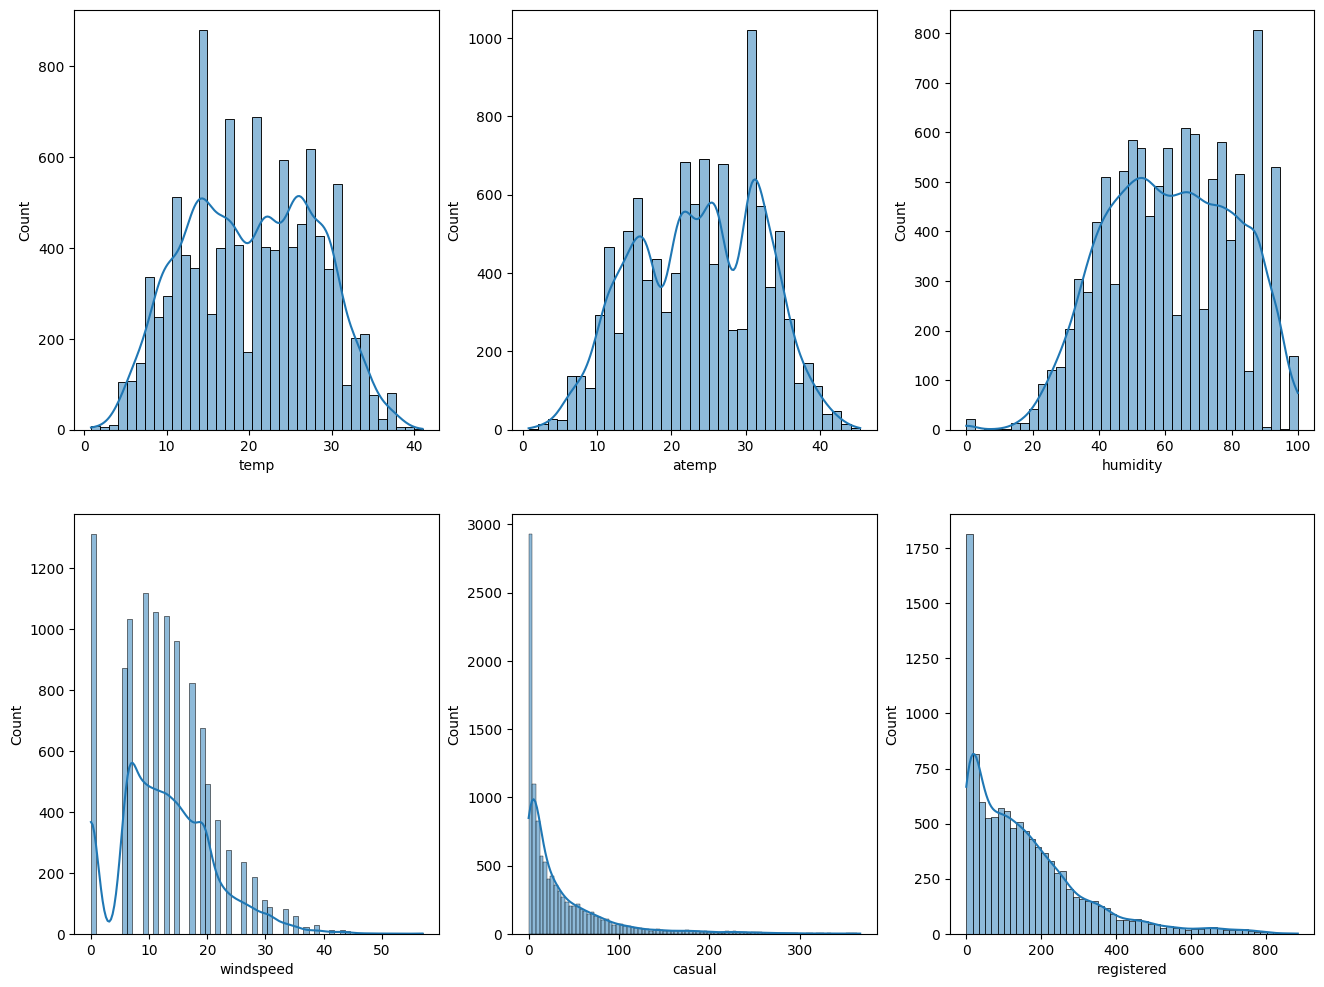

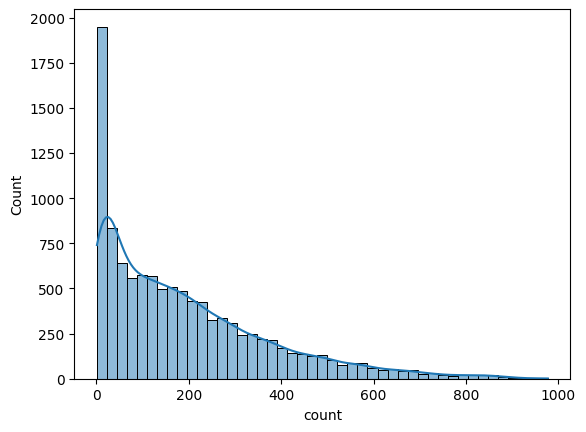

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

Observations:

- **casual**, **registered** and **count** follow Log Normal Distribution
- **temp**, **atemp** and **humidity** follow the Normal Distribution
- **windspeed** follows the Binomial Distribution

#### Outlier Detection

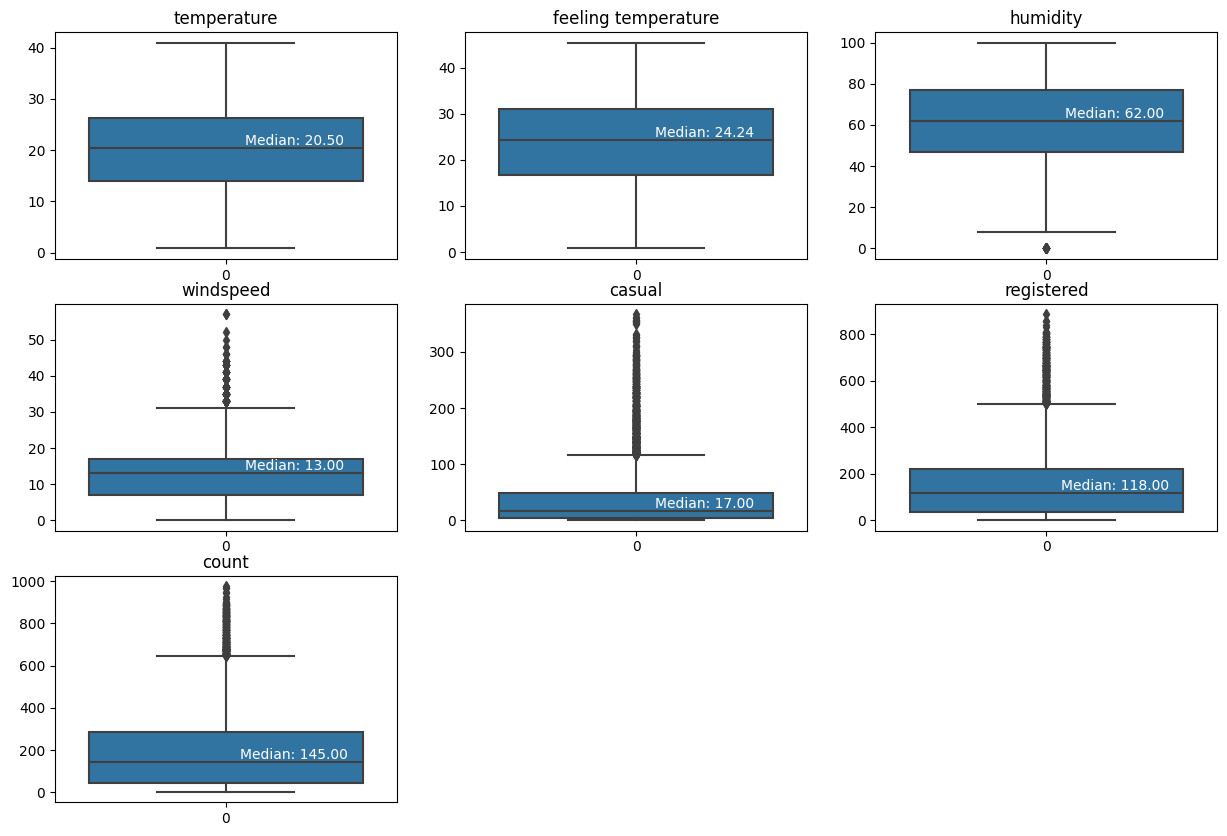

In [ ]:
plt.figure(figsize = (15,10))

# temperature
plt.subplot(3,3,1)
plt.title('temperature')
sns.boxplot(df['temp'])
temp_median = df['temp'].median()
plt.text(0.2, temp_median, f'Median: {temp_median:.2f}', ha='center', va='bottom', color='#ffffff')

# feeling temperature
plt.subplot(3,3,2)
plt.title('feeling temperature')
sns.boxplot(df['atemp'])
atemp_median = df['atemp'].median()
plt.text(0.2, atemp_median, f'Median: {atemp_median:.2f}', ha='center', va='bottom', color='#ffffff')

# humidity
plt.subplot(3,3,3)
plt.title('humidity')
sns.boxplot(df['humidity'])
humidity_median = df['humidity'].median()
plt.text(0.2, humidity_median, f'Median: {humidity_median:.2f}', ha='center', va='bottom', color='#ffffff')

# windspeed
plt.subplot(3,3,4)
plt.title('windspeed')
sns.boxplot(df['windspeed'])
windspeed_median = df['windspeed'].median()
plt.text(0.2, windspeed_median, f'Median: {windspeed_median:.2f}', ha='center', va='bottom', color='#ffffff')

# casual
plt.subplot(3,3,5)
plt.title('casual')
sns.boxplot(df['casual'])
casual_median = df['casual'].median()
plt.text(0.2, casual_median, f'Median: {casual_median:.2f}', ha='center', va='bottom', color='#ffffff')

# registered
plt.subplot(3,3,6)
plt.title('registered')
sns.boxplot(df['registered'])
registered_median = df['registered'].median()
plt.text(0.2, registered_median, f'Median: {registered_median:.2f}', ha='center', va='bottom', color='#ffffff')

# count
plt.subplot(3,3,7)
plt.title('count')
sns.boxplot(df['count'])
count_median = df['count'].median()
plt.text(0.2, count_median, f'Median: {count_median:.2f}', ha='center', va='bottom', color='#ffffff')

plt.show()

Observations:

- Except for `temp`, `atemp or feeling temperature` and `humidity`, all other features have **more** outliers

#### Weather vs User Count

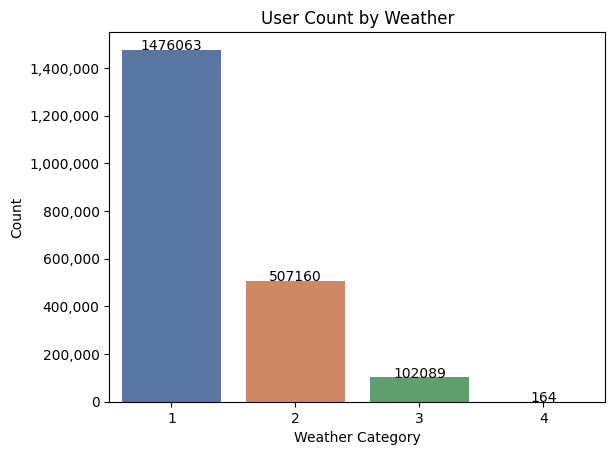

In [ ]:
import matplotlib.ticker as mtick

count_by_weather = df.groupby('weather')['count'].sum()

ax = sns.barplot(x=count_by_weather.index, y=count_by_weather.values, palette='deep')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for i, v in enumerate(count_by_weather.values):
    ax.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.title('User Count by Weather')

plt.show()

Observations:

Weather Categories:
```
1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
```

- Most users rented in `Clear or Partly Cloudy` weather conditions, followed by `Misty` weather conditions
- Least number of users rented in `Heavy Precipitation` conditions


#### Season vs User Count

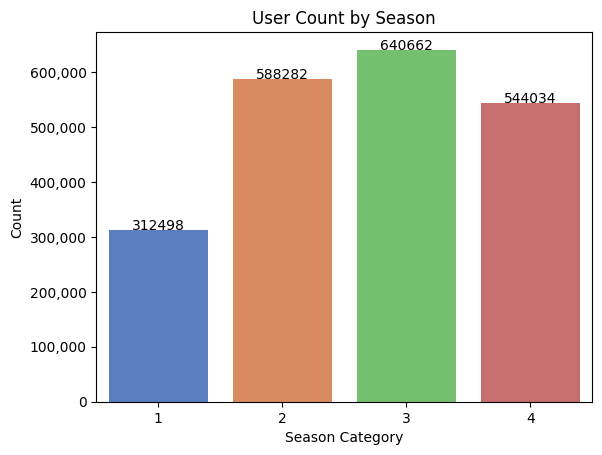

In [ ]:
import matplotlib.ticker as mtick

count_by_season = df.groupby('season')['count'].sum()

ax = sns.barplot(x=count_by_season.index, y=count_by_season.values, palette='muted')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for i, v in enumerate(count_by_season.values):
    ax.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Season Category')
plt.ylabel('Count')
plt.title('User Count by Season')

plt.show()

Observations:

```season : (1: spring, 2: summer, 3: fall, 4: winter)```

- Most of the users rented bikes in **fall** and **summer** season, followed by winter
- User rented least in the **spring** season


#### Workday vs User Count

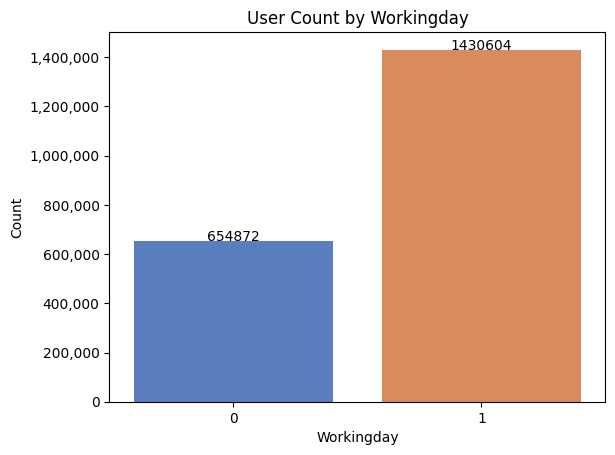

In [ ]:
import matplotlib.ticker as mtick

count_by_workingday = df.groupby('workingday')['count'].sum()

ax = sns.barplot(x=count_by_workingday.index, y=count_by_workingday.values, palette='muted')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for i, v in enumerate(count_by_workingday.values):
    ax.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Workingday')
plt.ylabel('Count')
plt.title('User Count by Workingday')

plt.show()

Observations:

- Most user rented bikes on a `working day`

#### Holiday vs User Count

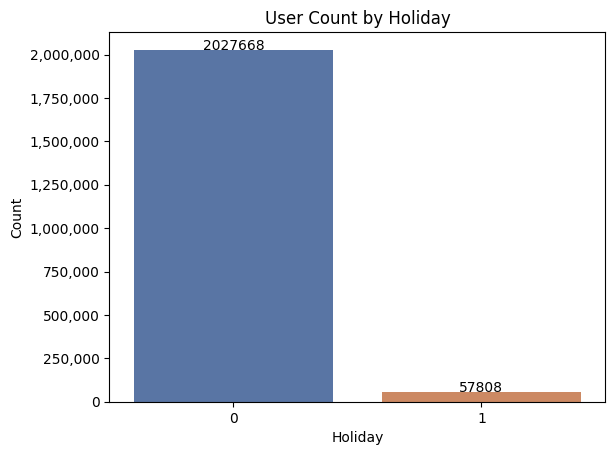

In [ ]:
import matplotlib.ticker as mtick

count_by_holiday = df.groupby('holiday')['count'].sum()

ax = sns.barplot(x=count_by_holiday.index, y=count_by_holiday.values, palette='deep')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for i, v in enumerate(count_by_holiday.values):
    ax.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('User Count by Holiday')

plt.show()

Observations:

- Most user rented bikes when its `not a holiday`

In [ ]:
# creating a new column 'year' and 'month' from 'datetime' for analysis
df['year'] = df['datetime'].dt.year

#### Year vs User Count

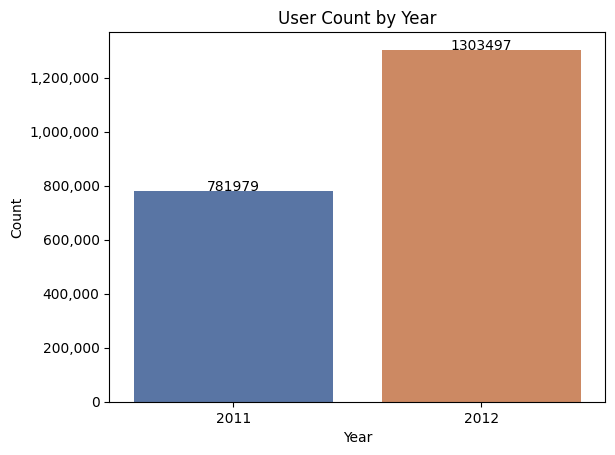

In [ ]:
import matplotlib.ticker as mtick

count_by_year = df.groupby('year')['count'].sum()

ax = sns.barplot(x=count_by_year.index, y=count_by_year.values, palette='deep')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for i, v in enumerate(count_by_year.values):
    ax.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('User Count by Year')

plt.show()

Observations:

- There is an increase in users renting bikes by **66.69%** from 2011 to 2012

### Bivariate Analysis

#### Correlation Matrix

<Axes: >

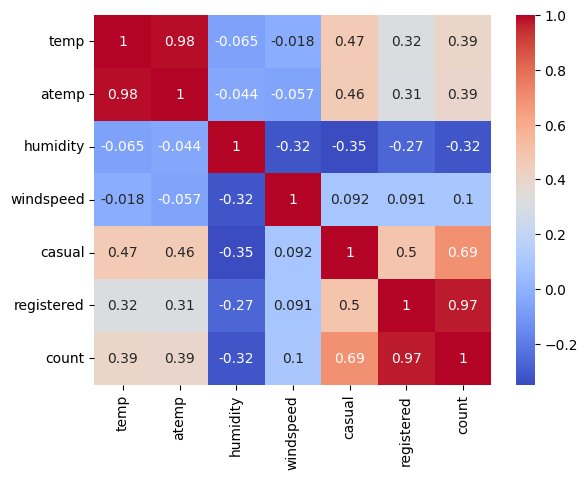

In [ ]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

Observations:

- `atemp` and `temp` have a strong correlation
- `count` and `registered` have a strong correlation
- `casual` and `count` also have a strong correlation

#### All Categorical Variables vs Count

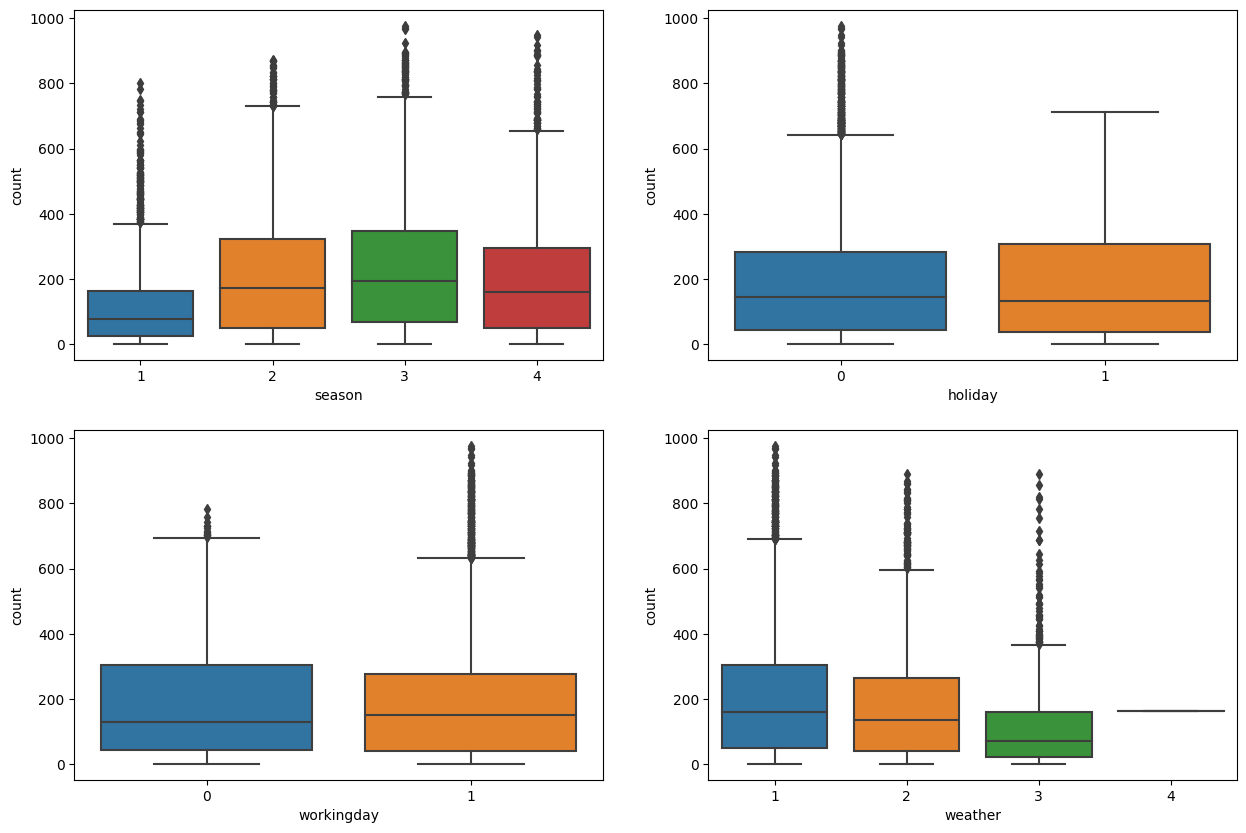

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

Observations:

- The median of number of users renting bikes on a holiday as well as on a working day is almost same
- More bikes were rented during **Clear or Partly Cloudy** weather conditions, followed by **Misty** weather conditions.
- Least number of users rented in **Heavy Precipitation** conditions

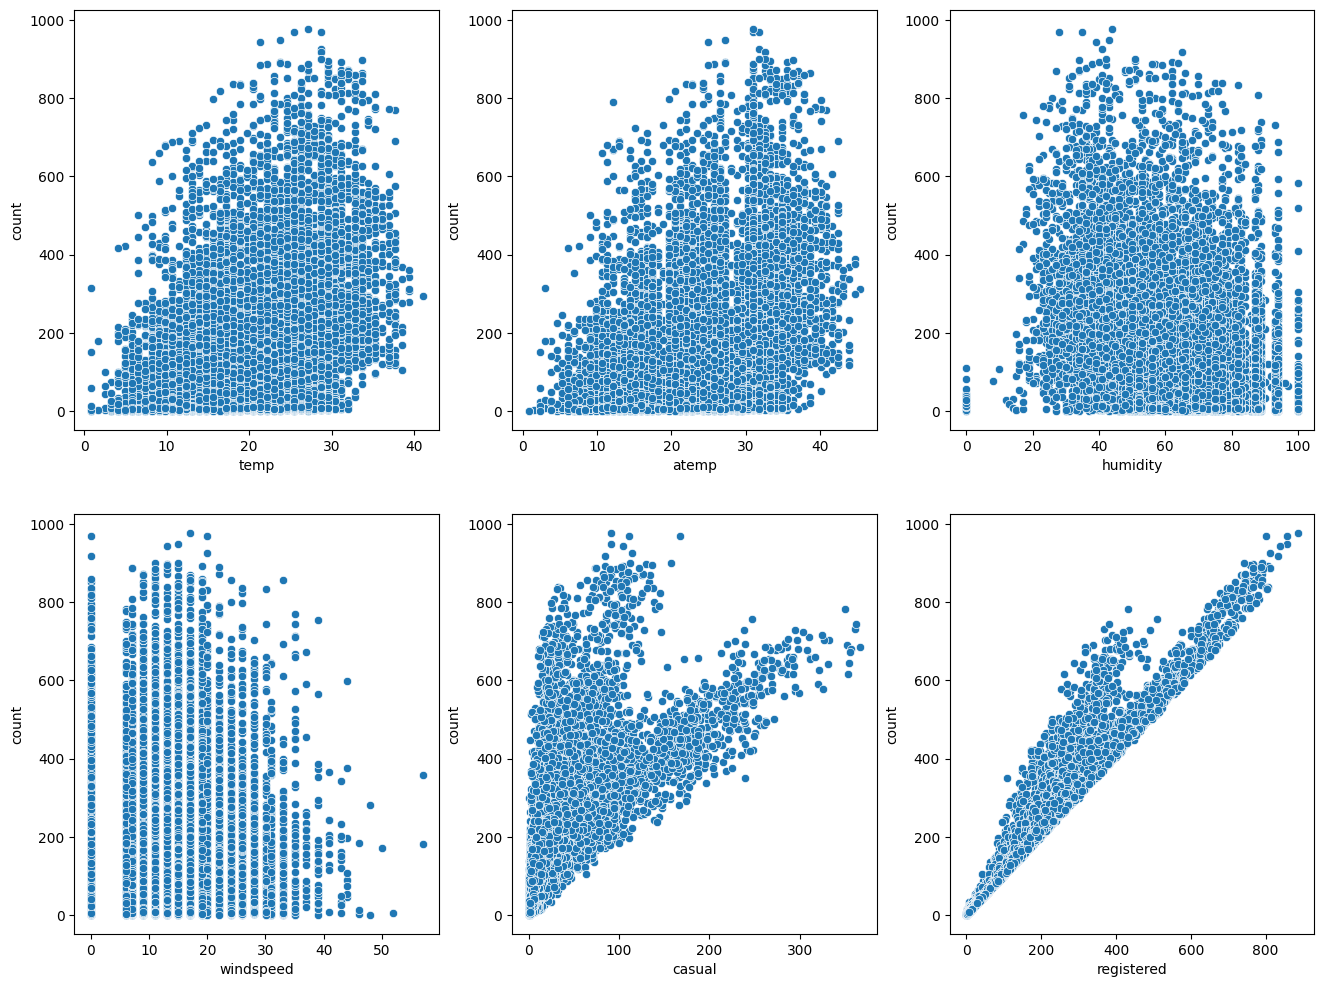

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

Observations:

- The number of rented bikes is extremely low when the humidity falls below 20
- Whenever the temperature is less than 10, number of bikes rented is less
- Whenever the windspeed is greater than 35, number of bikes rented is less
- Whenever the atemp or feeling temp is more than 45, less bikes are rented

## **Hypothesis Testing**

### Two - Sample T-Test

To check if **Working Day** has an effect on the **count**

- `Null Hypothesis (Ho)` : There is "**NO**" effect of **Working Day** on the **number of electric cycles rented**
- `Alternate Hypothesis (Ha)` : There is effect of **Working Day**  on the **number of electric cycles rented**

Significance level : `(alpha): 0.05`

We will use the 2-Sample T-Test to test the hypothess defined above

In [ ]:
wd_1 = df.loc[df['workingday'] == 1]['count'].values
wd_2 = df.loc[df['workingday'] == 0]['count'].values

Check for Normality using `Shapiro` Test

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(wd_1)
print(f"Shapiro-Wilk Test for wd_1: statistic={stat:.4f}, p-value={p:.4f}")

stat, p = shapiro(wd_2)
print(f"Shapiro-Wilk Test for wd_2: statistic={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk Test for wd_1: statistic=0.8703, p-value=0.0000
Shapiro-Wilk Test for wd_2: statistic=0.8852, p-value=0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- The Shapiro-Wilk test results show that the p-values for both `wd_1` and `wd_2` are 0.0000, which is less than the significance level of 0.05. This means that we can reject the null hypothesis that the data in `wd_1` and `wd_2` is normally distributed.

- In other words, the data in `wd_1` and `wd_2` is **not normally distributed** according to the Shapiro-Wilk test.

Check for Variance using `levene's` Test

In [ ]:
from scipy.stats import levene

stat, p = levene(wd_1, wd_2)
print(f"Levene's Test: statistic={stat:.4f}, p-value={p:.4f}")

Levene's Test: statistic=0.0050, p-value=0.9438


- The Levene's test result shows that the p-value is 0.9438, which is greater than the significance level of 0.05. This means that we cannot reject the null hypothesis that the population variances are equal.

- In other words, there is **not enough** evidence to suggest that there is a **significant difference** between the variances of the two samples `wd_1` and `wd_2`.

Since the assumption of Equal Variance is met, we can carry-forward the t-test

In [ ]:
t_stat, p_value = ttest_ind(wd_1,wd_2,equal_var=True)

print("t_stat :", t_stat, "p_value :" ,p_value)
print("----------------------------------------")

alpha = 0.05
if p_value < alpha:
  print("Reject Null Hypothesis, i.e There 'IS' effect of Working Day on the number of electric cycles rented")
else:
  print("Fail to Reject Null Hypothesis , i.e There is 'NO' effect of Working Day on the number of electric cycles rented")

t_stat : 1.2096277376026694 p_value : 0.22644804226361348
----------------------------------------
Fail to Reject Null Hypothesis , i.e There is 'NO' effect of Working Day on the number of electric cycles rented


##### Observations from `t-test`

- It is observed that, `we fail to reject Ho ; There is 'NO' effect of Working Day on the number of electric cycles rented`

### ANOVA



To check if No. of cycles rented is similar or different in different :
    
1. weather
    
2. season

#### ANOVA for Season

- `Null Hypothesis (Ho)` : No. of cycles rented is similar in different seasons

- `Alternate Hypothesis (Ha)` : No. of cycles rented is different in different seasons

Significance level : `(alpha): 0.05`


In [ ]:
spring_data = df.loc[df['season'] == 1]['count'].values
summer_data = df.loc[df['season'] == 2]['count'].values
fall_data = df.loc[df['season'] == 3]['count'].values
winter_data = df.loc[df['season'] == 4]['count'].values

Check for Normality using `Shapiro` Test :

In [ ]:
for i, array in enumerate([spring_data,summer_data,fall_data, winter_data]):
    stat, p = shapiro(array)
    print(f"Shapiro-Wilk Test for array {i+1}: statistic={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk Test for array 1: statistic=0.8087, p-value=0.0000
Shapiro-Wilk Test for array 2: statistic=0.9005, p-value=0.0000
Shapiro-Wilk Test for array 3: statistic=0.9148, p-value=0.0000
Shapiro-Wilk Test for array 4: statistic=0.8955, p-value=0.0000


- The Shapiro-Wilk test results show that the p-values for all four arrays are 0.0000, which is less than the significance level of 0.05. This means that we can reject the null hypothesis that the data in each array is normally distributed.
- In other words, the data in all four arrays is not normally distributed according to the Shapiro-Wilk test.

Checking Normality using `qqplot` :

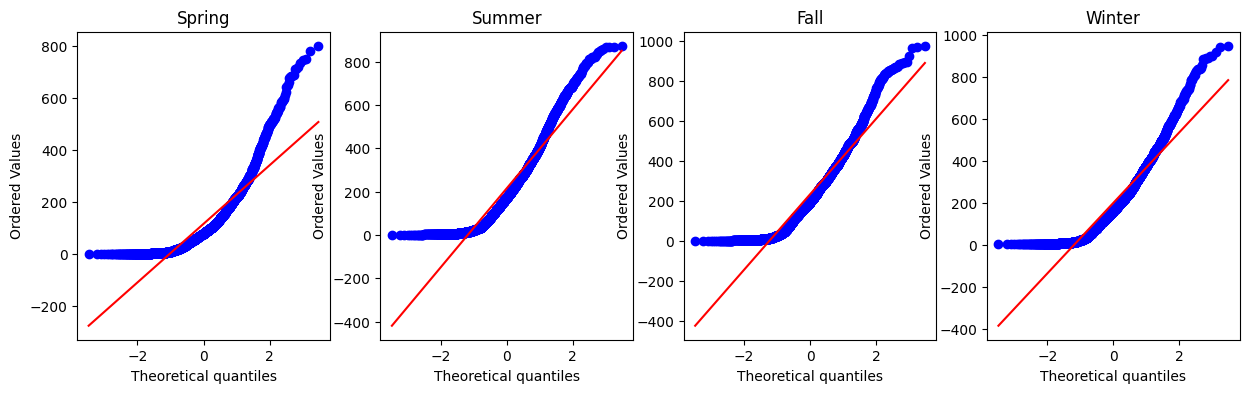

In [ ]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
data = [spring_data, summer_data, fall_data, winter_data]

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
for i, season in enumerate(seasons):
    stats.probplot(data[i], dist="norm", plot=axs[i])
    axs[i].set_title(season)

plt.show()

- From qqplot, it is evident that **none** of the seasonal data **follow Normal Distribution**

Check for Variance using `Levene's` Test :

In [ ]:
stat, p = levene(spring_data, summer_data, fall_data, winter_data)
print(f"Levene's Test: statistic={stat:.4f}, p-value={p:.4f}")

Levene's Test: statistic=187.7707, p-value=0.0000


- The Levene's test result shows that the p-value is 0.0000, which is less than the significance level of 0.05. This means that we can reject the null hypothesis that the population variances are equal.
- In other words, there is a significant difference between the variances of the samples.


- Based on the results of the Shapiro-Wilk test and Levene's test, it appears that the data does not meet the assumptions of normality and equal variances required for an ANOVA test. If these assumptions are not met, then the results of the ANOVA test may not be reliable.

In this case, we consider using a non-parametric test, such as the `Kruskal-Wallis` test, which does not assume normality or equal variances of the data.


In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(spring_data, summer_data, fall_data, winter_data)
print(f"Kruskal-Wallis Test: statistic={stat:.4f}, p-value={p:.4f}")

Kruskal-Wallis Test: statistic=699.6669, p-value=0.0000


- There is statistically significant evidence to suggest that the medians of the four groups are **not equal**. This means that the distributions of the data in the four groups are different.

Test

In [ ]:
f_stat, p_value = f_oneway(spring_data, summer_data, fall_data, winter_data)
print("p-Value is", p_value)
print("------------------------------------")
if p_value < 0.05:
 print("Reject Ho ; i.e, No. of cycles rented is different in different seasons")
else:
 print("Fail to reject Ho ; i.e, No. of cycles rented is similar in different seasons")

p-Value is 6.164843386499654e-149
------------------------------------
Reject Ho ; i.e, No. of cycles rented is different in different seasons


- From the above test result, it is observed that that `Ho` is `rejected`, which means that `No. of cycles rented is "different" in different seasons`

#### ANOVA for Weather

Weather Conditions

    o	1: Clear, Few clouds, partly cloudy, partly cloudy
    
    o	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    o	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    o	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


- `Null Hypothesis (Ho)` : No. of cycles rented is similar in different weather conditions

- `Alternate Hypothesis (Ha)` : No. of cycles rented is different in different weather conditions

Significance level : `(alpha): 0.05`

In [ ]:
weather_1 = df.loc[df['weather'] == 1]['count'].values
weather_2 = df.loc[df['weather'] == 2]['count'].values
weather_3 = df.loc[df['weather'] == 3]['count'].values
weather_4 = df.loc[df['weather'] == 4]['count'].values

Using `Kruskal Wallis Test`, since other two tests can't be performed due to sample inadequacy in some arrays

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(weather_1, weather_2, weather_3, weather_4)
print(f"Kruskal-Wallis Test: statistic={stat:.4f}, p-value={p:.4f}")

Kruskal-Wallis Test: statistic=205.0022, p-value=0.0000


- There is statistically significant evidence to suggest that `the medians of the four groups are not equal`. This means that the distributions of the data in the four groups are different.

Test

In [ ]:
f_stat, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)
print("p-Value is", p_value)
print("------------------------------------")
if p_value < 0.05:
 print("Reject Ho ; i.e, No. of cycles rented is different in different weather conditions")
else:
 print("Fail to reject Ho ; i.e, No. of cycles rented is similar in different weather conditions")

p-Value is 5.482069475935669e-42
------------------------------------
Reject Ho ; i.e, No. of cycles rented is different in different weather conditions


- From the above test result, it is observed that that `Ho` is `rejected`, which means that `No. of cycles rented is "different" in different weather conditions`

##### Observations from `ANOVA`

- No. of cycles rented is `"different"` in different seasons
- No. of cycles rented is `"different"` in different weather conditions

### Chi - Square Test

Check whether weather is dependent or independent of season

- `Null Hypothesis (H0)`: Weather is not dependent on the season

- `Alternate Hypothesis (H1)`: Weather is dependent on the season

Significance level `(alpha): 0.05`

In [ ]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
contingency_table = [[1759, 715, 211], [1801, 708, 224], [1930, 604, 199], [1702, 807, 225]]

chi2, pvalue, dof, expected = stats.chi2_contingency(contingency_table)

print('Chi-square test results:')
print('Chi-square:', chi2)
print('P-value:', pvalue)
print('Degrees of freedom:', dof)
print('Expected values:')
print(expected)

if p_value < 0.05:
 print("Reject Ho ; i.e, Weather is dependent on the season")
else:
 print("Fail to reject Ho ; i.e, Weather is not dependent on the season")

Chi-square test results:
Chi-square: 46.10145731073249
P-value: 2.8260014509929343e-08
Degrees of freedom: 6
Expected values:
[[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]
Reject Ho ; i.e, Weather is dependent on the season


##### Observations from `Chi-Square Test`:

- From the chi-square test it is evident that `weather is 'dependent' on the season`

## **Conclusions**

- Clear or Partly Cloudy weather conditions had the highest number of bike rentals.

- Heavy Precipitation conditions had the least number of bike rentals.

- Fall and summer seasons had the most bike rentals, followed by winter, with spring having the least.

- Most bike rentals occurred on working days.

- Bike rentals increased by 66.69% from 2011 to 2012.

- The median number of bike rentals on holidays and working days is similar.

- Bike rentals are extremely low when humidity falls below 20.

- Bike rentals decrease when temperature falls below 10 or windspeed exceeds 35.

- Bike rentals decrease when the feeling temperature exceeds 45.

- The number of electric cycles rented is not affected by whether it is a working day or not.

- The number of bike rentals varies across different seasons and weather conditions, with weather being dependent on the season.

## **Recommendations**

- **Target clear or partly cloudy weather conditions for maximum bike rentals**. This is the weather condition that is most conducive for biking, as it is not too hot or too cold, and there is no precipitation.

- **Avoid heavy precipitation conditions for bike rentals**. This is the weather condition that is least conducive for biking, as it is wet and slippery, and there is a risk of accidents.

- The company should ensure a larger stock of bikes for rental during the summer and fall seasons, as these periods see a surge in demand compared to other seasons.

- **Operate more bike rental stations in areas with high pedestrian traffic**. This will make it more convenient for people to rent bikes and will likely lead to increased rentals.

- **Offer discounts or promotions during the off-season**. This can help to attract more people to bike during times when the weather is not as favorable.

- **Partner with local businesses to offer discounts or promotions**. This could be a good way to reach a new audience and attract new customers.

- **Target tourists and commuters**. E-bikes are a popular choice for tourists who want to explore a city without having to exert too much effort. They are also a good option for commuters who want to save time and energy on their daily commute.

- **Data and analytics** can be leveraged to track the trends and patterns of bike rentals over time. This information can help to forecast the demand and supply of bikes, optimize the pricing and inventory strategies, and identify new opportunities or challenges for the business.



---